<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (White wine data)

The dataset contains information about several factors describing the quality of white wine. <br> Attribute information: 

**Fixed_Acidity:** The ph value for titrable acid content (0-7)

**Volatile_Acidity:** Measure of acidity due to bacteria

**Citric_Acid:** Amount of citric acid present in wine

**Residual_Sugar:** Amount of grape sugar in gms/litre

**Chlorides:** Amount of chlorides present in wine

**Free_Sulfur-dioxide:** Amount of SO2 that is not bound to other molecules

**Total_Sulfur-dioxide:** Portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine

**Density:** Density of wine (gms/cm<sup>3</sup>)

**pH:** The pH value of wine (0-14)

**Sulphates:** Amount of salts of sulphuric acid 

**Alcohol:** Alcohol content in percentage

**Quality:** Wine quality 

Data citation: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

## Table of Content

1. **[Feature Transformation](#trans)**
2. **[Feature Selection](#sel)**
3. **[Model Validation](#cv)**

**Import the required libraries**

In [1]:
# type your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats


#### Load the first dataset and check the first two observations

In [2]:
# load your data
# type your code here

df= pd.read_csv('/content/whitewine.csv', delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# check data types of variables
# type your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### Let's begin with some hands-on practice exercises

<a id="trans"> </a>
## 1. Feature Transformation

## We shall use the wine quality dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Does the variable 'volatile acidity' need transformation ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

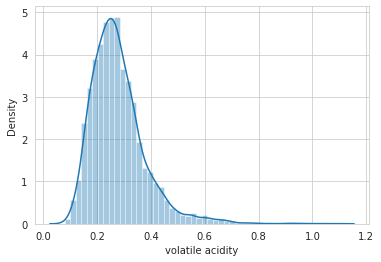

In [ ]:
# type your code here
sns.set_style('whitegrid')
sns.distplot(df['volatile acidity'])
plt.show()

yes the distribution of the variable is right skewed. hence it requires transformation .

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How can we reduce skewness of variable 'Residual_Sugar'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

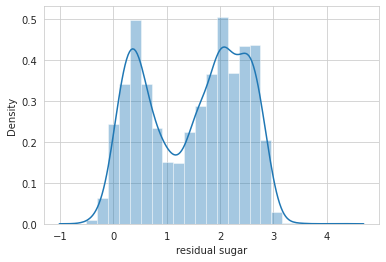

In [ ]:
# type your code here
sns.distplot(np.log(df['residual sugar']))
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there features in the dataset that add little to no information ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here
df.std()

fixed acidity            0.843868
volatile acidity         0.100795
citric acid              0.121020
residual sugar           5.072058
chlorides                0.021848
free sulfur dioxide     17.007137
total sulfur dioxide    42.498065
density                  0.002991
pH                       0.151001
sulphates                0.114126
alcohol                  1.230621
quality                  0.885639
dtype: float64

variation of features like 'density' and 'chlorides' are too low and hence may not be carrying much information .

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Which transformation method is best suited to treat the skewness in variable 'alcohol'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

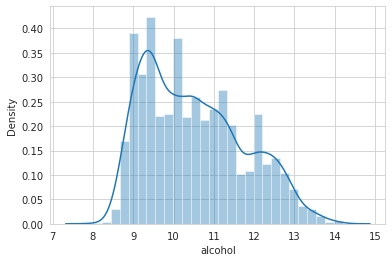

In [ ]:
# type your code here
sns.distplot(df['alcohol'])
plt.show()

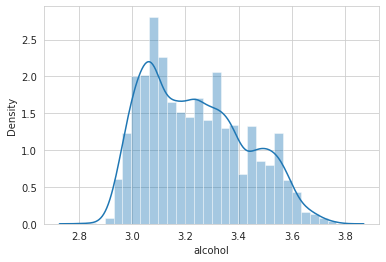

In [ ]:
sns.distplot(np.sqrt(df['alcohol']))
plt.show()

In [9]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
df2=df.copy()
df2['alcohol2']=pt.fit_transform(df2[['alcohol']])

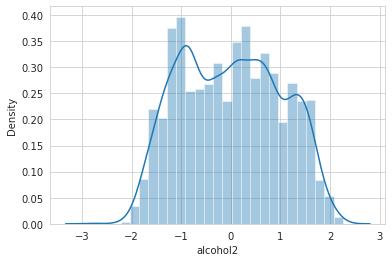

In [ ]:
sns.distplot(df2['alcohol2'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does scaling the feature 'pH' lead to better prediction when considering a full model ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here
y=df['quality']
x=df.drop('quality', axis=1)

import statsmodels.api as sm
xc=sm.add_constant(x)
model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Fri, 29 Jan 2021   Prob (F-statistic):               0.00
Time:                        11:28:43   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928     18.804      7.987      0.000     113.328     187.057
fixed acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.6863      0.105      6.513      0.000       0.480       0.893
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

df2['phs']=ss.fit_transform(df2[['pH']])

In [ ]:
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol2,phs
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,-1.630002,-1.246921
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,-0.811571,0.740029
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,-0.218621,0.475102
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,-0.406511,0.011480
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,-0.406511,0.011480


In [ ]:
y=df2['quality']
x=df2.drop(['quality','pH'], axis=1)

import statsmodels.api as sm
xc=sm.add_constant(x)
model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     163.8
Date:                Fri, 29 Jan 2021   Prob (F-statistic):               0.00
Time:                        11:31:49   Log-Likelihood:                -5526.3
No. Observations:                4898   AIC:                         1.108e+04
Df Residuals:                    4885   BIC:                         1.116e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  143.5459     19.006      7.553      0.000     106.286     180.806
fixed acidity            0.0762      0.021      3.652      0.000       0.035       0.117
volatile acidity        -1.9824      0.115    -17.211      0.000      -2.208      -1.757
citric acid             -0.0295      0.096     -0.308      0.758      -0.217       0.158
residual sugar           0.0761      0.008     10.075      0.000       0.061       0.091
chlorides               -0.3804      0.545     -0.698      0.485      -1.449       0.688
free sulfur dioxide      0.0037      0.001      4.372      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.925      0.355      -0.001       0.000
density               -145.4958     19.026     -7.647      0.000    -182.795    -108.197
sulphates                0.6418      0.100      6.414      0.000       0.446       0.838
alcohol                  0.5833      0.070      8.307      0.000       0.446       0.721
alcohol2                -0.4876      0.082     -5.912      0.000      -0.649      -0.326
phs                      0.1118      0.016      7.025      0.000       0.081       0.143
==============================================================================
Omnibus:                      105.793   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.680
Skew:                           0.064   Prob(JB):                     5.99e-50
Kurtosis:                       4.046   Cond. No.                     3.77e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Quality of prediction is same before and after standardization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What could be done to resolve the issue of multicollinearity if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here
y=df['quality']
x=df.drop('quality', axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import statsmodels.api as sm
xc=sm.add_constant(x)
vf=[vif(xc.values,i) for i in range(xc.shape[1])]
pd.DataFrame(vf, index=xc.columns, columns=['vif'])
#model=sm.OLS(y,xc).fit()
#model.summary()

,vif
const,3.067856e+06
fixed acidity,2.691435e+00
volatile acidity,1.141156e+00
citric acid,1.165215e+00
residual sugar,1.264406e+01
chlorides,1.236822e+00
free sulfur dioxide,1.787880e+00
total sulfur dioxide,2.239233e+00
density,2.823255e+01
pH,2.196362e+00


In [ ]:
xc.corr()

,const,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fixed acidity,NaN,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881
volatile acidity,NaN,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718
citric acid,NaN,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729
residual sugar,NaN,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631
chlorides,NaN,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189
free sulfur dioxide,NaN,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104
total sulfur dioxide,NaN,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892
density,NaN,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138
pH,NaN,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432


density and residual sugar got large vif values and they are highly correlated .

Hence while building model one of them can be dropped based on significance level.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.  Fit a full model. Is the assumption for normality of residuals violated ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

y=df['quality']
x=df.drop(['quality','citric acid','chlorides','total sulfur dioxide'], axis=1)

import statsmodels.api as sm
xc=sm.add_constant(x)

model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     239.7
Date:                Fri, 29 Jan 2021   Prob (F-statistic):               0.00
Time:                        11:43:49   Log-Likelihood:                -5544.1
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4889   BIC:                         1.116e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 154.1062     18.100      8.514      0.000     118.622     189.591
fixed acidity           0.0681      0.020      3.333      0.001       0.028       0.108
volatile acidity       -1.8881      0.110    -17.242      0.000      -2.103      -1.673
residual sugar          0.0828      0.007     11.370      0.000       0.069       0.097
free sulfur dioxide     0.0033      0.001      4.950      0.000       0.002       0.005
density              -154.2913     18.344     -8.411      0.000    -190.254    -118.329
pH                      0.6942      0.103      6.717      0.000       0.492       0.897
sulphates               0.6285      0.100      6.287      0.000       0.433       0.824
alcohol                 0.1932      0.024      8.021      0.000       0.146       0.240
==============================================================================
Omnibus:                      114.194   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.255
Skew:                           0.075   Prob(JB):                     2.76e-55
Kurtosis:                       4.099   Cond. No.                     9.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

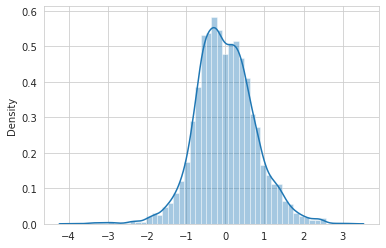

In [ ]:
residuals=model.resid
sns.distplot(residuals)
plt.show()

jarque berra test is available above and based on the probability we will conclude that residuals are not normally distributed.

hence the assumption of normality of residuals is violated.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Does the transformation of variable 'citric acid' affect the performance of prediction model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here
df2=df.copy()

y=df2['quality']
df2['lcitric']=np.log1p(df2[['citric acid']])
x=df2.drop(['quality','chlorides','citric acid','total sulfur dioxide'], axis=1)

import statsmodels.api as sm
xc=sm.add_constant(x)

model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     213.1
Date:                Fri, 29 Jan 2021   Prob (F-statistic):               0.00
Time:                        11:51:30   Log-Likelihood:                -5543.9
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4888   BIC:                         1.117e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 155.2199     18.188      8.534      0.000     119.564     190.876
fixed acidity           0.0666      0.021      3.240      0.001       0.026       0.107
volatile acidity       -1.8750      0.111    -16.820      0.000      -2.094      -1.656
residual sugar          0.0832      0.007     11.384      0.000       0.069       0.098
free sulfur dioxide     0.0033      0.001      4.882      0.000       0.002       0.005
density              -155.4336     18.435     -8.432      0.000    -191.574    -119.293
pH                      0.7009      0.104      6.746      0.000       0.497       0.905
sulphates               0.6257      0.100      6.252      0.000       0.430       0.822
alcohol                 0.1916      0.024      7.913      0.000       0.144       0.239
lcitric                 0.0834      0.133      0.629      0.529      -0.176       0.343
==============================================================================
Omnibus:                      114.591   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.178
Skew:                           0.076   Prob(JB):                     1.74e-55
Kurtosis:                       4.101   Cond. No.                     9.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

transformation of citric acid is not changing the prediction quality.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model. Check whether variable has linear relationship with the wine quality<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here
y=df['quality']
x=df.drop(['quality','chlorides','total sulfur dioxide'], axis=1)

import statsmodels.api as sm
xc=sm.add_constant(x)

model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     213.1
Date:                Fri, 29 Jan 2021   Prob (F-statistic):               0.00
Time:                        11:53:12   Log-Likelihood:                -5544.1
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4888   BIC:                         1.117e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 154.3717     18.186      8.488      0.000     118.718     190.025
fixed acidity           0.0678      0.021      3.299      0.001       0.027       0.108
volatile acidity       -1.8855      0.111    -16.995      0.000      -2.103      -1.668
citric acid             0.0144      0.095      0.152      0.879      -0.172       0.201
residual sugar          0.0829      0.007     11.348      0.000       0.069       0.097
free sulfur dioxide     0.0033      0.001      4.921      0.000       0.002       0.005
density              -154.5631     18.433     -8.385      0.000    -190.701    -118.426
pH                      0.6958      0.104      6.696      0.000       0.492       0.900
sulphates               0.6279      0.100      6.275      0.000       0.432       0.824
alcohol                 0.1928      0.024      7.969      0.000       0.145       0.240
==============================================================================
Omnibus:                      114.278   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.434
Skew:                           0.075   Prob(JB):                     2.52e-55
Kurtosis:                       4.100   Cond. No.                     9.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

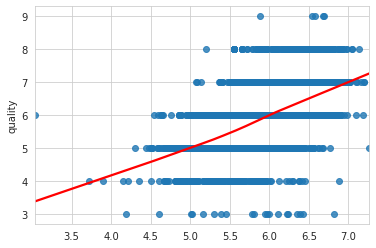

In [ ]:
y_pred=model.predict(xc)
sns.regplot(x=y_pred, y=y, lowess=True, line_kws={'color':'red'})
plt.show()

In [ ]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(model)

(1.060248043259223, 0.07411832569602293)

H0= fit of model using full sample= fit of mode using central subset

H1: fit of model using full sample is worse compared to fit of mode using central subset

<a id="sel"> </a>
## 2. Feature Selection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Find the top five significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using these five variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here
y=df['quality']
x=df.drop(['quality','chlorides','total sulfur dioxide'], axis=1)

from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
lr=LinearRegression()
sfs1=sfs(lr, k_features=5, forward=True, scoring='r2', cv=3)
sfs1.fit(x,y)

SequentialFeatureSelector(clone_estimator=True, cv=3,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          floating=False, forward=True, k_features=5, n_jobs=1,
                          pre_dispatch='2*n_jobs', scoring='r2', verbose=0)

In [ ]:
sf=pd.DataFrame(sfs1.subsets_).T

In [ ]:
sf.iloc[4]['feature_names']

('volatile acidity',
 'residual sugar',
 'free sulfur dioxide',
 'sulphates',
 'alcohol')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Find the top five significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using these five variables.<br><br> Compare the R-squared value obtained from question 10 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here
y=df['quality']
x=df.drop(['quality'], axis=1)

from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
lr=LinearRegression()
sfs1=sfs(lr, k_features=5, forward=False, scoring='r2', cv=3)
sfs1.fit(x,y)

In [ ]:
sf=pd.DataFrame(sfs1.subsets_).T
sf

,feature_idx,cv_scores,avg_score,feature_names
1,"(10,)","[0.16574618114101625, 0.20917912605444067, 0.1...",0.176708,"(alcohol,)"
2,"(1, 10)","[0.21385833173588997, 0.23852024663773108, 0.2...",0.229091,"(volatile acidity, alcohol)"
3,"(1, 3, 10)","[0.2022050407706666, 0.26510556487096437, 0.25...",0.242409,"(volatile acidity, residual sugar, alcohol)"
4,"(1, 3, 9, 10)","[0.2051433432036156, 0.27069449023626424, 0.25...",0.243901,"(volatile acidity, residual sugar, sulphates, ..."
5,"(1, 3, 5, 9, 10)","[0.21122032123102397, 0.27693899742367056, 0.2...",0.244463,"(volatile acidity, residual sugar, free sulfur..."


In [ ]:
sf.iloc[6]['feature_names']

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the best set of significant variables from the dataset using forward selection technique such that the selected set should have 2 to 6 features. Also display the R-squared score for the model built using the selected variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
dtypes: float64(11)
memory usage: 421.0 KB


In [5]:
# type your code here
y=df['quality']
x=df.drop(['quality'], axis=1)

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
lr=LinearRegression()
sfs1=sfs(lr, k_features=11, forward=True, scoring='r2', cv=3)
sfs1.fit(x,y)

SequentialFeatureSelector(clone_estimator=True, cv=3,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          floating=False, forward=True, k_features=11, n_jobs=1,
                          pre_dispatch='2*n_jobs', scoring='r2', verbose=0)

In [6]:
sf=pd.DataFrame(sfs1.subsets_).T
sf[sf['avg_score']==sf['avg_score'].max()]

,feature_idx,cv_scores,avg_score,feature_names
5,"(1, 3, 5, 9, 10)","[0.21122032123102397, 0.27693899742367056, 0.2...",0.244463,"(volatile acidity, residual sugar, free sulfur..."


In [7]:
list(sf[sf['avg_score']==sf['avg_score'].max()]['feature_names'])

[('volatile acidity',
  'residual sugar',
  'free sulfur dioxide',
  'sulphates',
  'alcohol')]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Find the best set of significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using the selected variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [21]:
# type your code here
qual=df['quality']
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, GridSearchCV
ar = LinearRegression()
rfe_1 = RFE(ar)
to_sel = {'n_features_to_select': list(range(1,df2.shape[1]-1))}
gs= GridSearchCV(rfe_1, param_grid= to_sel,scoring= 'r2', cv=3)
gs.fit(df,qual)  

GridSearchCV(cv=3, error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                  11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [22]:
gs.best_params_

{'n_features_to_select': 1}

In [23]:
sfs_2 = sfs(ar, k_features=8, cv=3 ,n_jobs=-1)
sfs_2.fit(df2, qual)

SequentialFeatureSelector(clone_estimator=True, cv=3,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          floating=False, forward=True, k_features=8, n_jobs=-1,
                          pre_dispatch='2*n_jobs', scoring=None, verbose=0)

In [24]:
we = list(sfs_2.k_feature_names_)

In [26]:
import statsmodels.api as sm
df_temp = df2[we]
xc= sm.add_constant(df_temp)
md= sm.OLS(qual, xc).fit()

In [27]:
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.152e+30
Date:                Sun, 31 Jan 2021   Prob (F-statistic):               0.00
Time:                        11:16:32   Log-Likelihood:             1.4745e+05
No. Observations:                4898   AIC:                        -2.949e+05
Df Residuals:                    4889   BIC:                        -2.948e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.728e-14 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the best set of significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using the selected variables. <br><br>Compare the R-squared value obtained from question 13 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
# type your code here
rfe_ = RFE(ar, n_features_to_select = 8)
rfe_.fit(df2, qual)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=8, step=1, verbose=0)

In [29]:
al2 = pd.DataFrame(rfe_.ranking_, index=df2.columns, columns=['ranks'])
al2.loc[al2['ranks'] == 1]

,ranks
fixed acidity,1
volatile acidity,1
citric acid,1
chlorides,1
density,1
sulphates,1
alcohol,1
quality,1


In [30]:
we2= list(al2.loc[al2['ranks'] == 1].index)


In [31]:
df_temp = df2[we2]
xc= sm.add_constant(df_temp)
md= sm.OLS(qual, xc).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.571e+28
Date:                Sun, 31 Jan 2021   Prob (F-statistic):               0.00
Time:                        11:17:14   Log-Likelihood:             1.3955e+05
No. Observations:                4898   AIC:                        -2.791e+05
Df Residuals:                    4889   BIC:                        -2.790e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.901e-13   8.44e-13  

In [ ]:
# RFE helped  with 8 features.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Find the best set of significant variables from the dataset among all the possible subsets of the variables. Build a linear regression model using the best subset and find the R-Squared value for that model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
# type your code here

df_temp = df2[we2]
xc= sm.add_constant(df_temp)
md= sm.OLS(qual, xc).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.571e+28
Date:                Sun, 31 Jan 2021   Prob (F-statistic):               0.00
Time:                        11:17:49   Log-Likelihood:             1.3955e+05
No. Observations:                4898   AIC:                        -2.791e+05
Df Residuals:                    4889   BIC:                        -2.790e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.901e-13   8.44e-13  

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Calculate the RMSE for the train set and test set for the model created using the top 5 variables obtained from forward selection in question 10. Check if the model is overfitted on the train set or not. If yes, then why do you think so?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
# type your code here

rtr= df2[list(sfs_2.k_feature_names_)]
from sklearn.model_selection import train_test_split
x_tr, x_ts, y_tr, y_ts = train_test_split(rtr, qual)

In [38]:
xc= sm.add_constant(x_tr)
md= sm.OLS(y_tr, xc).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.796e+30
Date:                Sun, 31 Jan 2021   Prob (F-statistic):               0.00
Time:                        11:19:32   Log-Likelihood:             1.1191e+05
No. Observations:                3673   AIC:                        -2.238e+05
Df Residuals:                    3664   BIC:                        -2.238e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.791e-14 

In [39]:
xc1= sm.add_constant(x_ts)
md= sm.OLS(y_ts, xc1).fit()
print(md.summary())

#The model is slightly overfitting on training data. 

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.438e+28
Date:                Sun, 31 Jan 2021   Prob (F-statistic):               0.00
Time:                        11:19:45   Log-Likelihood:                 36062.
No. Observations:                1225   AIC:                        -7.211e+04
Df Residuals:                    1216   BIC:                        -7.206e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.164e-14 

In [40]:
y_tr_score = md.predict(xc)

xtr = sm.add_constant(x_ts)
y_ts_score = md.predict(xtr)

In [41]:
len(y_tr)


3673

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

print('training', r2_score(y_tr_score, y_tr), mean_squared_error(y_tr_score, y_tr))
print('test', r2_score(y_ts_score, y_ts), mean_squared_error(y_ts_score, y_ts))

training 1.0 1.6006875852924824e-27
test 1.0 1.5753531348300814e-27


<a id="cv"> </a>
## 3. Model Validation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Create a new feature based on the 'pH' which tells whether wine is acidic, basic or neutral. Will this variable significantly contribute to the model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
# type your code here
df_r = df2.copy()
df_r.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol2
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,-1.630002
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,-0.811571
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,-0.218621
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,-0.406511
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,-0.406511


In [44]:
df_r['cat_pH'] = pd.cut(df_r['pH'], bins=3, labels=['acidic', 'normal', 'basic'])

In [45]:
df_r = pd.get_dummies(data= df_r, columns=['cat_pH'], drop_first=True)

In [46]:
df_r.drop({'pH'}, axis=1, inplace= True)


In [47]:
xc1= sm.add_constant(df_r)
md= sm.OLS(qual, xc1).fit()
print(md.summary())


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.303e+27
Date:                Sun, 31 Jan 2021   Prob (F-statistic):               0.00
Time:                        11:21:19   Log-Likelihood:             1.3360e+05
No. Observations:                4898   AIC:                        -2.672e+05
Df Residuals:                    4883   BIC:                        -2.671e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  5.64e-14 

P values of both of them are less than 0.05- so both of them are significantly contributing.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Fit the a full model. Validate the model using cross validation method</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [48]:
# type your code here
xc1= sm.add_constant(df2)
md= sm.OLS(qual, xc1).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.960e+30
Date:                Sun, 31 Jan 2021   Prob (F-statistic):               0.00
Time:                        11:22:02   Log-Likelihood:             1.5095e+05
No. Observations:                4898   AIC:                        -3.019e+05
Df Residuals:                    4884   BIC:                        -3.018e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -6.138e-13 

In [49]:
ar = LinearRegression()
from sklearn.model_selection import cross_val_score
Kf = KFold(n_splits=5, shuffle=True, random_state=4)
cv = cross_val_score(ar, df2, qual, scoring = 'r2', cv=Kf)
cv

array([1., 1., 1., 1., 1.])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Fit the a full model. Validate the model using 5 - fold cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Fit the a full model. Validate the model using leave one out cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here